In [622]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [623]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Cleaning
## The columns which are not numeric will be converted to numeric and the columns with too many NaNs will be removed (e.g., the Cabin)

In [624]:
print("Total number of samples in train set is:", len(train))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(train.isnull().sum())

Total number of samples in train set is: 891
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### From the above cell output, the cabin column has too many NaN values, so we will remove it. Also, we will replace the other NaN values in the Age and Embarked columns with their average values (or most frequent values in the case of discrete distribution)

In [625]:
trData = train.drop('Cabin', 1)
# Name and Ticket number are also dropped. Name is irelevant and Ticket number is unique for each person (i.e. 891 different tickets!)
trData = trData.drop('Name', 1)
trData = trData.drop('Ticket', 1)

testData = test.drop('Cabin', 1)
# Name and Ticket number are also dropped. Name is irelevant and Ticket number is unique for each person (i.e. 891 different tickets!)
testData = testData.drop('Name', 1)
testData = testData.drop('Ticket', 1)

In [626]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [627]:
trData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [628]:
testData[testData['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [629]:
testData['Fare'] = testData['Fare'].fillna(trData['Fare'].mean())
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [630]:
# Age has a lot of missing data (177 out of 891), we replace the missing ages with the average value
trData['Age']  = trData['Age'].fillna(trData['Age'].mean());
testData['Age']  = testData['Age'].fillna(trData['Age'].mean());

In [631]:
trData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [632]:
trData[trData['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [633]:
# remove the two rows without Embarked Info
trData = trData.drop(trData.index[[61, 829]]);
len(trData)

889

In [634]:
# reset the index
trData = trData.reset_index()

In [635]:
trData.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,S
1,1,2,1,1,female,38.0,1,0,71.2833,C
2,2,3,1,3,female,26.0,0,0,7.9250,S
3,3,4,1,1,female,35.0,1,0,53.1000,S
4,4,5,0,3,male,35.0,0,0,8.0500,S


In [636]:
trData = trData.drop('index', 1);

In [637]:
trData['Sex'] = trData['Sex'].replace(['female', 'male'],[0,1])
testData['Sex'] = testData['Sex'].replace(['female', 'male'],[0,1])

In [638]:
print(trData['Embarked'].unique())
print(testData['Embarked'].unique())

['S' 'C' 'Q']
['Q' 'S' 'C']


In [639]:
trData['Embarked'] = trData['Embarked'].replace(['S','C','Q'],[0,1,2])
testData['Embarked'] = testData['Embarked'].replace(['S','C','Q'],[0,1,2])
trData.head()
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


In [640]:
trData['Nfamily'] = trData['Parch'] + trData['SibSp']
testData['Nfamily'] = testData['Parch'] + testData['SibSp']

# Statistical Analysis and feature engineering

In [641]:
trData[['Nfamily', 'Survived']].groupby(['Nfamily'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Nfamily,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.300935
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [642]:
trData[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.336957


In [643]:
trData[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,0,0.740385
1,1,0.188908


In [644]:
trData[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.343234
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [645]:
trData['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [646]:
trData[['Pclass','Fare','Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Fare,Survived
0,1,84.193516,0.626168
1,2,20.662183,0.472826
2,3,13.675550,0.242363


In [647]:
pd.crosstab(trData['Sex'], trData['Survived'])

Survived,0,1
Sex,,
0,81,231
1,468,109


In [648]:
X = trData[['Pclass', 'Sex','Age', 'Fare', 'Nfamily', 'Embarked']]
y = trData['Survived']
X.head()
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Nfamily
0,892,3,1,34.5,0,0,7.8292,2,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,2,0
3,895,3,1,27.0,0,0,8.6625,0,0
4,896,3,0,22.0,1,1,12.2875,0,2


In [649]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [650]:
# Knearest neighbor
score = []
for n in range(1, 50):
    kneighbor = KNeighborsClassifier(n_neighbors=n)
    kneighbor.fit(Xtrain, ytrain)
    ypredict = kneighbor.predict(Xtest)
    score.append(metrics.accuracy_score(ytest, ypredict))
max(score)

0.71748878923766812

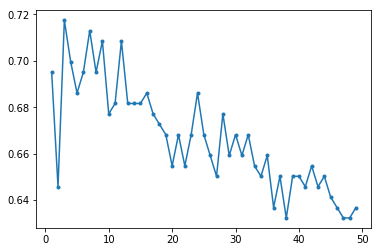

In [651]:
plt.plot(range(1,50), score,'.-')
plt.show()

In [652]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
ypredict = logreg.predict(Xtest)
lgscore = (metrics.accuracy_score(ytest, ypredict))
lgscore

0.82959641255605376

In [653]:
# Naive Baise
from sklearn.naive_bayes import GaussianNB
naiveB = GaussianNB()
naiveB.fit(Xtrain, ytrain)
ypredict = naiveB.predict(Xtest)
nbscore = (metrics.accuracy_score(ytest, ypredict))
nbscore

0.820627802690583

In [654]:
# SVM
svmclf = SVC()
svmclf.fit(Xtrain, ytrain)
ypredict = svmclf.predict(Xtest)
svmscore = metrics.accuracy_score(ytest, ypredict)
svmscore

0.69506726457399104

## From the above comparisons Logistic Regression with an accuracy of 0.83 is the best predictor 

In [655]:
score = []
logreg = LogisticRegression()
logreg.fit(X, y)
metrics.accuracy_score(ytest, arpredict)

0.8340807174887892

In [656]:
testDataTemp = testData[['Pclass','Sex','Age', 'Fare','Nfamily','Embarked']]
arPredict = logreg.predict(testDataTemp)

In [657]:
yPredict = pd.DataFrame({'PassengerId':testData['PassengerId'], 'Survived': arPredict})

In [658]:
yPredict.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [659]:
yPredict.to_csv('../predictions.csv', index = False)
yPredict.shape

(418, 2)

In [660]:
X.head()

,Pclass,Sex,Age,Fare,Nfamily,Embarked
0,3,1,22.0,7.2500,1,0
1,1,0,38.0,71.2833,1,1
2,3,0,26.0,7.9250,0,0
3,1,0,35.0,53.1000,1,0
4,3,1,35.0,8.0500,0,0


In [661]:
testDataTemp.head()

,Pclass,Sex,Age,Fare,Nfamily,Embarked
0,3,1,34.5,7.8292,0,2
1,3,0,47.0,7.0000,1,0
2,2,1,62.0,9.6875,0,2
3,3,1,27.0,8.6625,0,0
4,3,0,22.0,12.2875,2,0
